In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#load diabetes dataset
from sklearn.datasets import load_diabetes


In [64]:
data = load_diabetes()

In [65]:
#Let's create feature matrix and target vector
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [66]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=123,shuffle=True)

In [67]:
#let's fit the model with Linear Regression and observer the r2 score and mean squared error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

L = LinearRegression()
L.fit(X_train, y_train)
y_pred = L.predict(X_test)
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.5078253552814807
Mean Squared Error:  2926.8196257936315


In [68]:
#Let's use Ridge Regression and observe the r2 score and mean squared error
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0055)
R.fit(X_train, y_train)
y_pred_ridge = R.predict(X_test)
print("Ridge Regression R2 Score: ", r2_score(y_test, y_pred_ridge))
print("Ridge Regression Mean Squared Error: ", mean_squared_error(y_test, y_pred_ridge))

Ridge Regression R2 Score:  0.5074263604922215
Ridge Regression Mean Squared Error:  2929.192331889577


In [69]:
#Let's now fit the model with Lasso Regression and observer the r2 score and mean squared error
from sklearn.linear_model import Lasso
Lasso_model = Lasso(alpha=0.005)
Lasso_model.fit(X_train, y_train)
y_pred_lasso = Lasso_model.predict(X_test)
print("Lasso Regression R2 Score: ", r2_score(y_test, y_pred_lasso))
print("Lasso Regression Mean Squared Error: ", mean_squared_error(y_test, y_pred_lasso))

Lasso Regression R2 Score:  0.5083535787521403
Lasso Regression Mean Squared Error:  2923.6784342728542


In [70]:
#Let's create a toy dataset of degree 10
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**10 + np.random.normal(0, 0.1, size=X.shape)

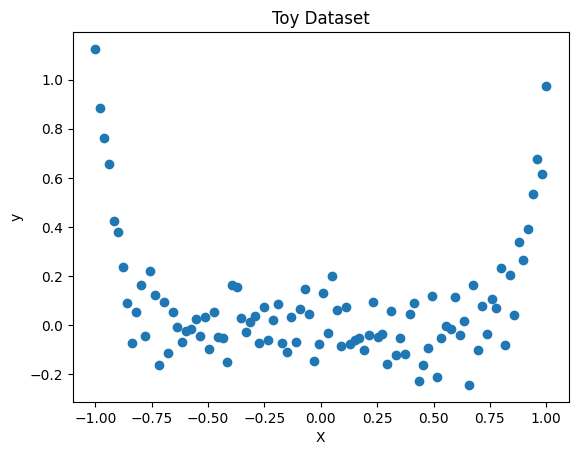

In [71]:
#Plot the dataset
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.title("Toy Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [72]:
#Let's try to fit polynomial regression of degree 10 without regularization
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)

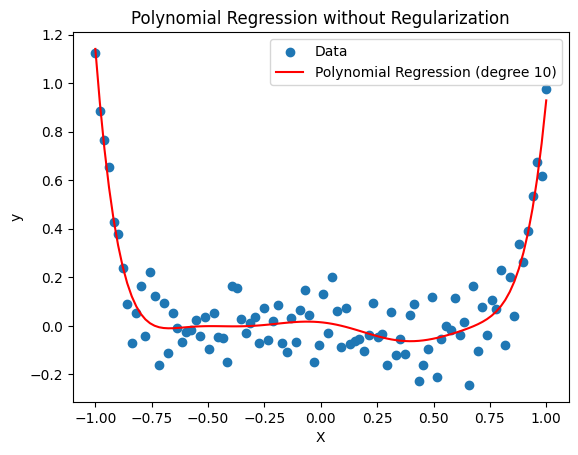

In [73]:
#let''s plot the results
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression (degree 10)')
plt.title("Polynomial Regression without Regularization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [74]:
#Let's apply Ridge Regression and Lasso Regression for polynomial features with different alpha value for same dataset and observe the results
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge_model_1 = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=1.0))
ridge_model_2 = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=10.0))
ridge_model_3 = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=100.0))

lasso_model_1 = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=0.0001))
lasso_model_2 = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=0.001))
lasso_model_3 = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=0.01))

ridge_model_1.fit(X, y)
ridge_model_2.fit(X, y)
ridge_model_3.fit(X, y)

lasso_model_1.fit(X, y)
lasso_model_2.fit(X, y)
lasso_model_3.fit(X, y)

y_pred_ridge_1 = ridge_model_1.predict(X)   
y_pred_ridge_2 = ridge_model_2.predict(X)   
y_pred_ridge_3 = ridge_model_3.predict(X)   

y_pred_lasso_1 = lasso_model_1.predict(X)   
y_pred_lasso_2 = lasso_model_2.predict(X)   
y_pred_lasso_3 = lasso_model_3.predict(X)

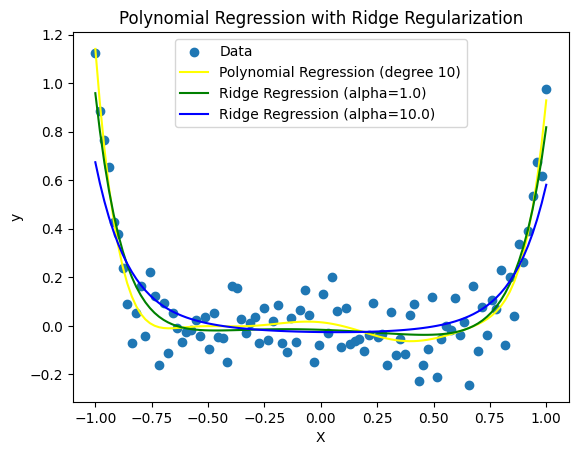

In [75]:
#Plot the dataset with Ridge Regression and Lasso Regression for different alpha values
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='yellow', label='Polynomial Regression (degree 10)')
plt.plot(X, y_pred_ridge_1, color='green', label='Ridge Regression (alpha=1.0)')
plt.plot(X, y_pred_ridge_2, color='blue', label='Ridge Regression (alpha=10.0)')


plt.title("Polynomial Regression with Ridge Regularization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show() 

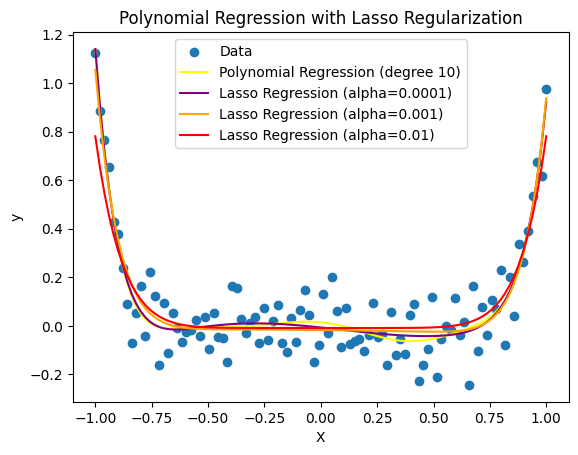

In [76]:
#With Lasso Regression
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='yellow', label='Polynomial Regression (degree 10)')
plt.plot(X, y_pred_lasso_1, color='purple', label='Lasso Regression (alpha=0.0001)')
plt.plot(X, y_pred_lasso_2, color='orange', label='Lasso Regression (alpha=0.001)')
plt.plot(X, y_pred_lasso_3, color='red', label='Lasso Regression (alpha=0.01)')
plt.title("Polynomial Regression with Lasso Regularization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [77]:
#Let's create two dataframe of weights for Ridge and Lasso Regression for different alpha values 

ridge_model_1 = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=1.0))
ridge_model_2 = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=10.0))
ridge_model_3 = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=100.0))
ridge_model_4 = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=1000.0))
ridge_model_5 = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=10000.0))
ridge_model_6 = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=100000.0))


lasso_model_1 = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=0.0001))
lasso_model_2 = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=0.001))
lasso_model_3 = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=0.01))
lasso_model_4 = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=0.1))
lasso_model_5 = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=1))
lasso_model_6 = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=10))

ridge_model_1.fit(X, y)
ridge_model_2.fit(X, y)
ridge_model_3.fit(X, y)
ridge_model_4.fit(X, y)
ridge_model_5.fit(X, y)
ridge_model_6.fit(X, y)


lasso_model_1.fit(X, y)
lasso_model_2.fit(X, y)
lasso_model_3.fit(X, y)
lasso_model_4.fit(X, y)
lasso_model_5.fit(X, y)
lasso_model_6.fit(X, y)

y_pred_ridge_1 = ridge_model_1.predict(X)   
y_pred_ridge_2 = ridge_model_2.predict(X)   
y_pred_ridge_3 = ridge_model_3.predict(X)   
y_pred_ridge_4 = ridge_model_4.predict(X)   
y_pred_ridge_5 = ridge_model_5.predict(X)   
y_pred_ridge_6 = ridge_model_6.predict(X)   

y_pred_lasso_1 = lasso_model_1.predict(X)   
y_pred_lasso_2 = lasso_model_2.predict(X)   
y_pred_lasso_3 = lasso_model_3.predict(X)
y_pred_lasso_4 = lasso_model_4.predict(X)
y_pred_lasso_5 = lasso_model_5.predict(X)
y_pred_lasso_6 = lasso_model_6.predict(X)

#Create a dataframe for Ridge coefficients and if term is less than 
ridge_coefficients = pd.DataFrame({
    'alpha_1.0': ridge_model_1.named_steps['ridge'].coef_,
    'alpha_10.0': ridge_model_2.named_steps['ridge'].coef_,
    'alpha_100.0': ridge_model_3.named_steps['ridge'].coef_,
    'alpha_1000.0': ridge_model_4.named_steps['ridge'].coef_,
    'alpha_10000.0': ridge_model_5.named_steps['ridge'].coef_,
    'alpha_100000.0': ridge_model_6.named_steps['ridge'].coef_ 
})

#Create a dataframe for Lasso coefficients
lasso_coefficients = pd.DataFrame({
    'alpha_0.0001': lasso_model_1.named_steps['lasso'].coef_,
    'alpha_0.001': lasso_model_2.named_steps['lasso'].coef_,
    'alpha_0.01': lasso_model_3.named_steps['lasso'].coef_,
    'alpha_0.1': lasso_model_4.named_steps['lasso'].coef_,
    'alpha_1': lasso_model_5.named_steps['lasso'].coef_,
    'alpha_10': lasso_model_6.named_steps['lasso'].coef_   
})

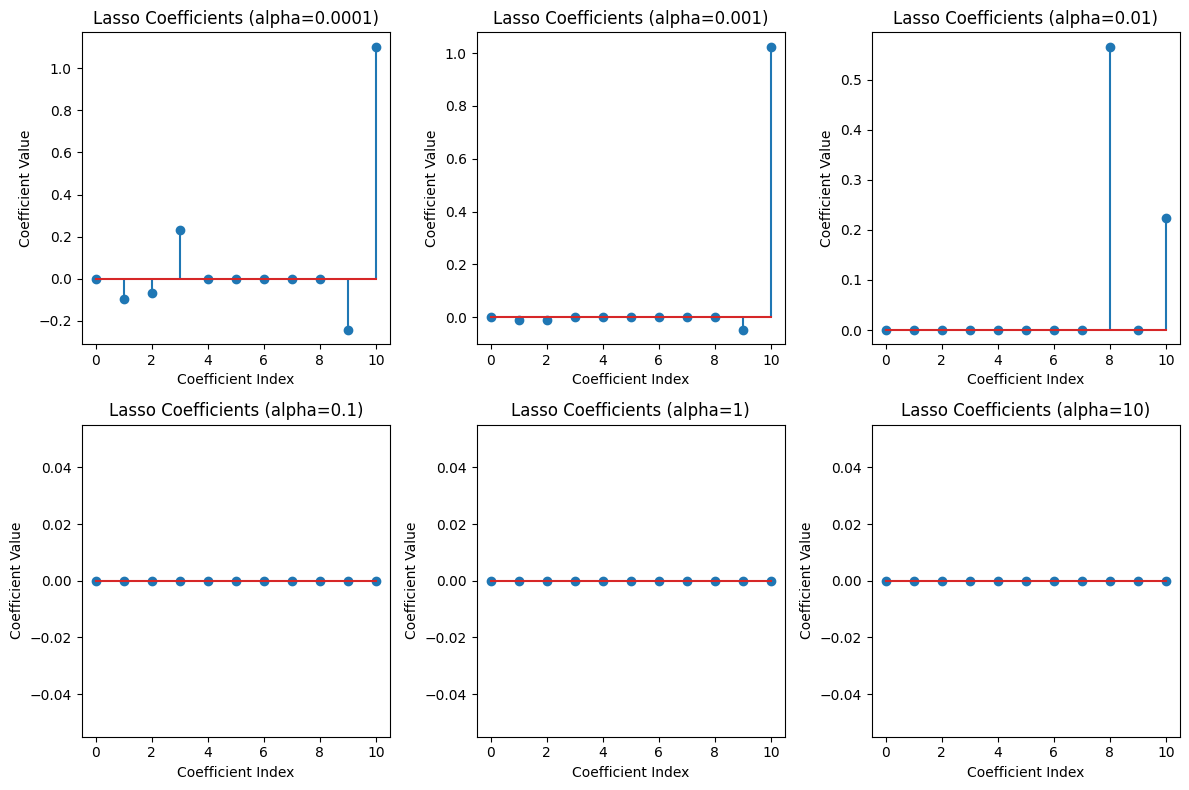

In [81]:
#Let's plot the coefficients graph for different alpha values of lasso regression, plot row by row
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i, alpha in enumerate(lasso_coefficients.columns):
    plt.subplot(2, 3, i+1)
    plt.stem(lasso_coefficients[alpha])
    plt.title(f'Lasso Coefficients (alpha={alpha.split("_")[1]})')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

### Coefficient Shrinkage with L1 regularization (Lasso Regression) with different alpha values


In [79]:
#Let's observe the coefficients for different alpha values
coefficients_1 = ridge_model_1.named_steps['ridge'].coef_
coefficients_2 = ridge_model_2.named_steps['ridge'].coef_
coefficients_3 = ridge_model_3.named_steps['ridge'].coef_   

print("Ridge Regression Coefficients with alpha=1.0: ", coefficients_1)
print("Ridge Regression Coefficients with alpha=10.0: ", coefficients_2)
print("Ridge Regression Coefficients with alpha=100.0: ", coefficients_3)

Ridge Regression Coefficients with alpha=1.0:  [ 0.         -0.03089683 -0.09232363  0.05429561  0.10655521  0.0070615
  0.22948476 -0.03584557  0.30621616 -0.06480965  0.35443798]
Ridge Regression Coefficients with alpha=10.0:  [ 0.         -0.01140251  0.07489128 -0.00129699  0.12446346 -0.00688483
  0.14506041 -0.01180694  0.1532201  -0.01501492  0.15549561]
Ridge Regression Coefficients with alpha=100.0:  [ 0.         -0.00544731  0.03747702 -0.00332816  0.04228831 -0.00331136
  0.04207823 -0.00343493  0.04062033 -0.00349468  0.03886608]
